### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.DataFrame([
["Edward Remirez","Male",28,"Bachelors"],
["Arnav Sharma","Male",23,"Masters"],
["Sophia Smith","Female",19,"High School"]], columns = 
["Name","Gender","Age","Degree"])

##### Make nominal attributes usable

In [3]:
from sklearn.preprocessing import OneHotEncoder
# Make encoder_for_gender an object of OneHotEncoder
# and make it a "sklearn transformer"
encoder_for_gender = OneHotEncoder().fit(df[['Gender']])
# encoder_for_gender.categories_

In [4]:
gender_values = encoder_for_gender.transform(df[['Gender']])

In [5]:
df[['Gender_F','Gender_M']] = gender_values.toarray()
gender_values
# gender_values is a sparse matrix type, we have to turn it into array 
# before we put it into dataframe

<3x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

#### Make ordinal attributes usable

In [6]:
from sklearn.preprocessing import OrdinalEncoder
encoder_for_education = OrdinalEncoder(categories=[['High School','Bachelors','Masters','Doctoral']])
# df[['Degree_encoded']] = encoder_for_education.fit_transform(df[['Degree']])
encoder_for_education.fit(df[['Degree']])
df[['Degree_encoded']] = encoder_for_education.transform(df[['Degree']])
df


,Name,Gender,Age,Degree,Gender_F,Gender_M,Degree_encoded
0,Edward Remirez,Male,28,Bachelors,0.0,1.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,2.0
2,Sophia Smith,Female,19,High School,1.0,0.0,0.0


In [7]:
df.drop(columns=['Name','Gender','Degree'], inplace=True)
# Name has little use, and Gender and Degree are useless
df

,Age,Gender_F,Gender_M,Degree_encoded
0,28,0.0,1.0,1.0
1,23,0.0,1.0,2.0
2,19,1.0,0.0,0.0


#### Normalize data

In [8]:
# Min-Max Scaling
# largest number would be 1, and smallest would be 0 and others would be linear interpolation
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df[['Age']])
# df[['Age']] = scaler.transform(df[['Age']])
# df

In [9]:
# Standard Scaling
# new val = (x-mean)/std. deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df
# these are the statistics of the original data, which "scaler" learned during fit():
# scaler.mean_
# scaler.scale_

,Age,Gender_F,Gender_M,Degree_encoded
0,1.267500,0.0,1.0,1.0
1,-0.090536,0.0,1.0,2.0
2,-1.176965,1.0,0.0,0.0


### Preprocessing Text

In [10]:
import nltk
# nltk.download('punkt_tab')

In [11]:
# from nltk.tokenize import word_tokenize
# word_tokenize("Let's learn machine learning")

In [12]:
# tokens = [t.lower() for t in word_tokenize("Let's learn machine learning")]
# print(tokens)

In [13]:
# # For example, work and working has similar meaning
# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()
# # for token in tokens:
# #     print(token, " : ", stemmer.stem(token))
# stemmed_tokens = [stemmer.stem(token) for token in tokens]
# stemmed_tokens

In [14]:
# For example, "a" and "the" appear a lot but have little meaning
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# eng_stopwords = stopwords.words('english')
# for token in stemmed_tokens:
#     if(token in stopwords.words('english')):
#         stemmed_tokens.remove(token)

#### Finally the text should be turned into vector
![Alt text](text_to_vector.png)
#### If we start over:

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
data = ["Let's learn Machine Learning Now", "The Machines are Learning", "It is Learning Time"]
eng_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

tokens = [word_tokenize(d) for d in data]

tokens = [[word.lower() for word in line] for line in tokens]

# stemmed_tokens = [[stemmer.stem(word) for word in line] for line in tokens]

for i, line in enumerate(tokens):
    tokens[i] = [word for word in line if word not in eng_stopwords]
    tokens[i] = ' '.join(tokens[i])
matrix = CountVectorizer()
X = matrix.fit_transform(tokens).toarray()

# matrix.get_feature_names_out()
pd.DataFrame(X, columns=matrix.get_feature_names_out())

,learn,learning,let,machine,machines,time
0,1,1,1,1,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1


### Preprocessing Images

In [2]:
import matplotlib.pyplot as plt

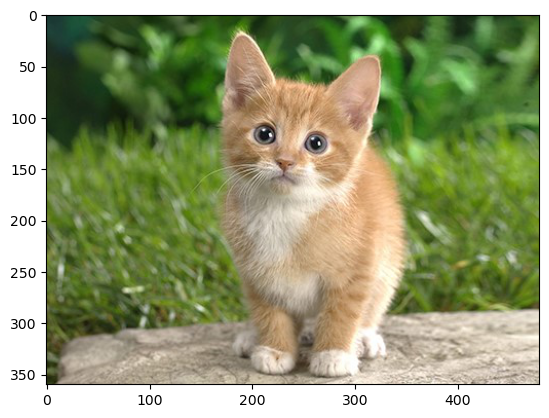

In [3]:
img = plt.imread("C:\\Users\\88692\\Documents\\cat.jpg")
plt.imshow(img)

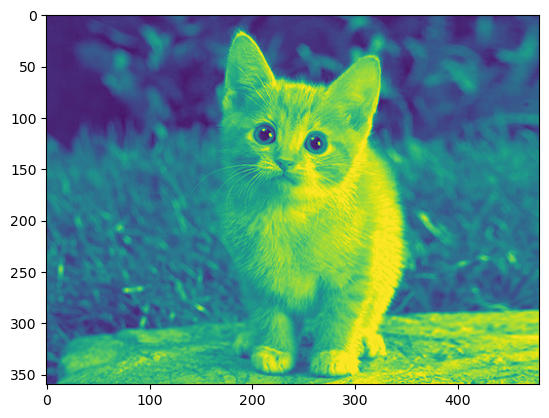

In [4]:
# How we get the red channel of image
plt.imshow(img[:,:,0]) 

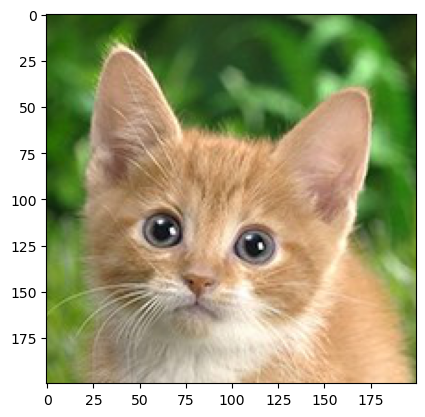

In [9]:
cropped_image = img[0:200,150:350, :]
plt.imshow(cropped_image)

In [10]:
from skimage import io, filters

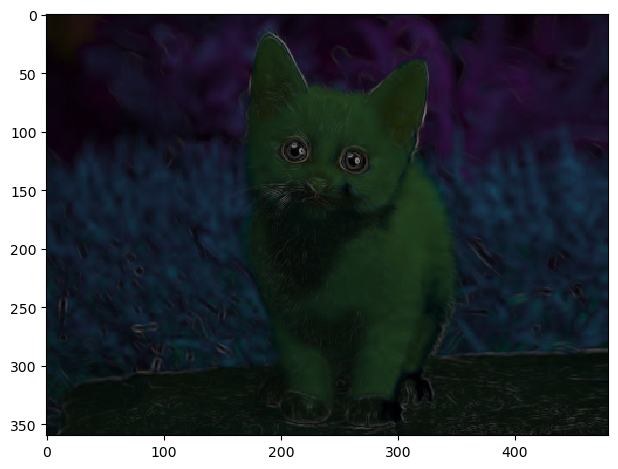

In [14]:
img = plt.imread("C:\\Users\\88692\\Documents\\cat.jpg")
edges = filters.sobel(img)
io.imshow(edges)